# Data Viz Tutorial

In this notebook, I'll be following the tutorial from [pythonprogramming.net.]("https://pythonprogramming.net/matplotlib-intro-tutorial/")

### Basics of Matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

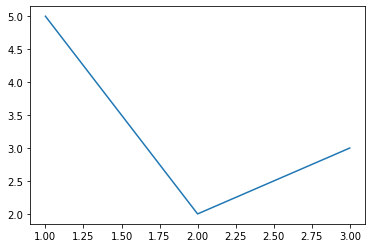

In [2]:
plt.plot([1, 2, 3], [5, 2, 3]) #this draws our graph onto a background
plt.show() # this show the before drawn graph

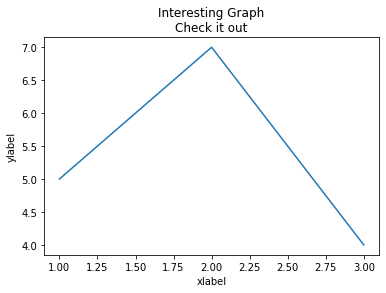

In [3]:
x = [1, 2, 3]
y = [5, 7, 4]

plt.plot(x, y)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Interesting Graph\nCheck it out")
plt.show()

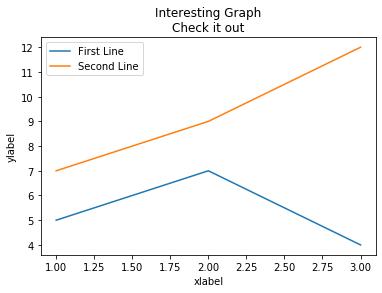

In [4]:
x1 = [1, 2, 3]
y1 = [5, 7, 4]

x2 = [1, 2, 3]
y2 = [7, 9, 12]

plt.plot(x1, y1, label = "First Line")
plt.plot(x2, y2, label="Second Line")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.legend()
plt.title("Interesting Graph\nCheck it out")
plt.show()

### Bar Charts and Histograms

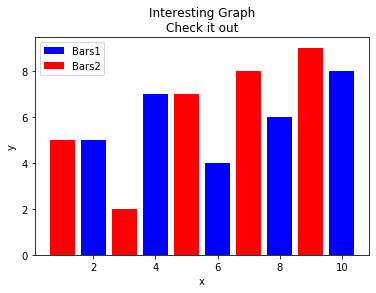

In [5]:
# Bar charts:

x = [2, 4, 6, 8, 10]
y = [5, 7, 4, 6, 8]

x2 = [1, 3, 5, 7, 9]
y2 = [5, 2, 7, 8, 9]

plt.bar(x, y, label="Bars1", color="b")
plt.bar(x2, y2, label="Bars2", color="r")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interesting Graph\nCheck it out")
plt.show()

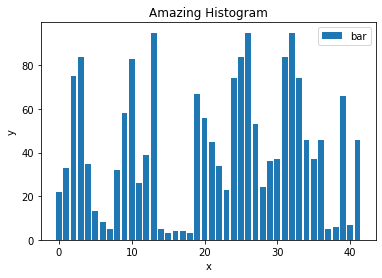

In [6]:
# Histograms:

population_ages = [22, 33, 75, 84, 35, 13, 8, 5, 32, 58, 83, 26, 39, 95, 5, 3, 4, 4, 3, 67, 56, 45, 34, 23, 74, 84, 95, 53, 24, 36, 37, 84, 95, 74, 46, 37, 46, 5, 6, 66, 7, 46]
ids = [x for x in range (len(population_ages))]

plt.bar(ids, population_ages, label="bar")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Amazing Histogram")
plt.legend()
plt.show()

# this is not great for showing a distribution! instead, use a histogram!

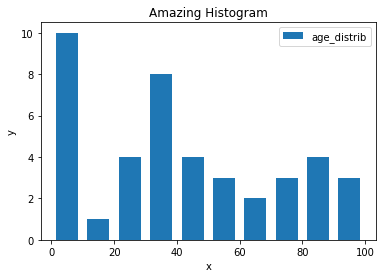

In [7]:
population_ages = [22, 33, 75, 84, 35, 13, 8, 5, 32, 58, 83, 26, 39, 95, 5, 3, 4, 4, 3, 67, 56, 45, 34, 23, 74, 84, 95, 53, 24, 36, 37, 84, 95, 74, 46, 37, 46, 5, 6, 66, 7, 46]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(population_ages, bins=bins, histtype="bar", rwidth=0.7, label="age_distrib")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Amazing Histogram")
plt.legend()
plt.show()

### Scatter Plots

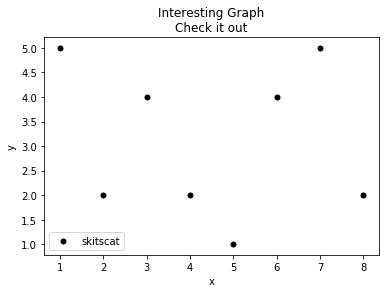

In [8]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

plt.scatter(x,y, label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

# Stack Plots

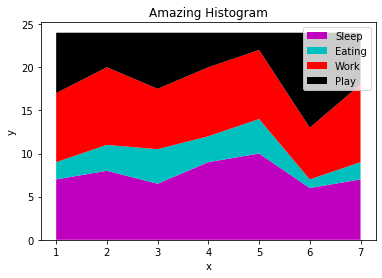

In [9]:
import numpy as np

days = [1, 2, 3, 4, 5, 6, 7]

sleeping = [7, 8, 6.5, 9, 10, 6, 7]
eating =   [2, 3, 4, 3, 4, 1, 2]
working =  [8, 9, 7, 8, 8, 6, 9]
playing =  [7, 4, 6.5, 4, 2, 11, 6]

labels = ["Sleep", "Eating", "Work", "Play"]

plt.stackplot(days, [sleeping, eating, working, playing], colors=["m", "c", "r", "k"], labels=labels)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Amazing Histogram")
plt.legend()
plt.show()

### Pie Charts

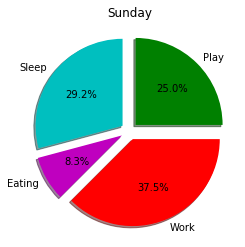

In [10]:
import numpy as np

days = [1, 2, 3, 4, 5, 6, 7]

sleeping = [7, 8, 6.5, 9, 10, 6, 7]
eating =   [2, 3, 4, 3, 4, 1, 2]
working =  [8, 9, 7, 8, 8, 6, 9]
playing =  [7, 4, 6.5, 4, 2, 11, 6]

slices = [7, 2, 9, 6]

labels = ["Sleep", "Eating", "Work", "Play"]

plt.pie(slices,
        labels=labels,
        colors=["c","m","r","g"],
        startangle=90,
        explode=(0.1, 0.1, 0.1, 0.1),
        autopct='%1.1f%%',
        shadow=True
        )

#plt.xlabel("x")
#plt.ylabel("y")
plt.title("Sunday")
#plt.legend()
plt.show()

### Loading Data from Files

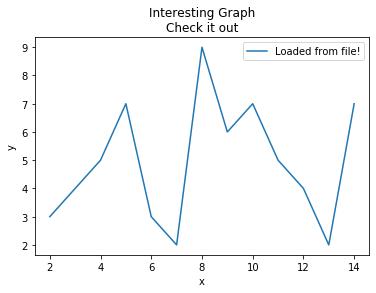

In [13]:
import csv

x = []
y = []

with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

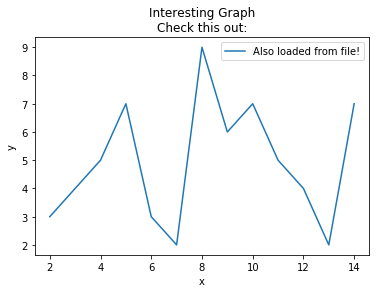

In [14]:
# another way:

import numpy as np

x, y = np.loadtxt("example.txt", delimiter=",", unpack=True)
plt.plot(x, y, label="Also loaded from file!")

plt.xlabel("x")
plt.ylabel("y")
plt.title('Interesting Graph\nCheck this out:')
plt.legend()
plt.show()

### Using Data from the Internet

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  import sys


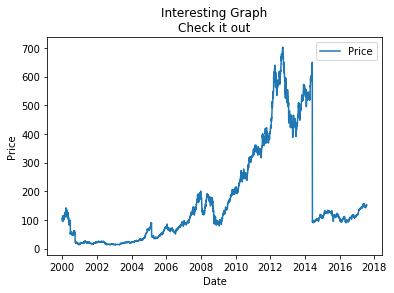

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    
    # Unfortunately, Yahoo's API is no longer available
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()


graph_data('TSLA')

### Basic Customization with Matplotlib

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  import sys


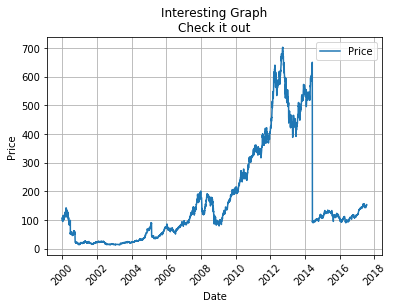

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    
    
    # Unfortunately, Yahoo's API is no longer available
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()


graph_data('TSLA')

### Colors and Fills

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  
No handles with labels found to put in legend.


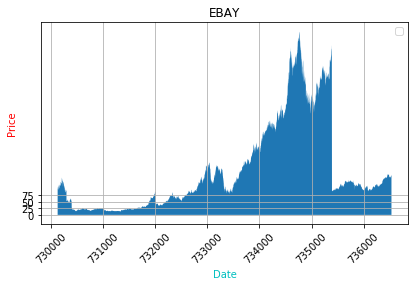

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.fill_between(date, 0, closep)

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  


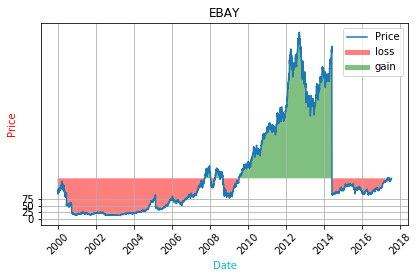

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')